In [9]:
import matplotlib.pyplot as plt
plt.rc('font', size=12)
import pandas as pd
import seaborn as sns
import warnings 

import Coverage as cov

warnings.filterwarnings('ignore')
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Params

In [10]:
#get list of client rules sorted by count
popSize = 100
clientFilename = "../Data/ICU/Best/"
# clientFilename = "../Data/ICU/Test/"
# clientFilename = "../Data/Sepsis/Best/"

ldpFilename = "../Results/ICU_Base_TEST.csv"
# ldpFilename = "../Results/ICU_Ruleset_MCTS_TEST.csv"
# ldpFilename = "../Results/ICU_TEST_2.csv"
# ldpFilename = "../Results/Sepsis_Ruleset_MCTS_Test.csv"

graphName = '../Results/Graphs/test' #Name of count coverage graphs
popThresh = 0.01 #Percentage match count


## Load Client Rules

In [12]:
# Load Client Rule Trees and Text Rule Structures, and get dataframe of rules and their counts
clientTrees, clientRules, clientDF = cov.loadClientRules(popSize, clientFilename)
clientDF

File not found for Client 8
File not found for Client 81


,Rule,Rule Count,Percent of Population
53,"((MET >= 0.000) U[0,0] (death = 0.000))",231,1.00
57,"G[0,0]((n_evts <= 0.000 -> LOS >= 0.000))",203,1.00
56,"F[0,0]((BLOOD_UREA_NITROGEN <= 0.000 & CREATIN...",74,0.74
229,"F[0,0](((af <= 0.000 | AF <= 0.000) & cosen >=...",42,0.42
47,"G[0,0]((hr >= 0.000 & Pulse >= 0.000))",39,0.39
...,...,...,...
1870,"((af <= 0.000) U[0,0] (srr <= 0.000))",1,0.01
1871,"((n_edrk <= 0.000) U[0,0] (PLATELET_COUNT >= 0...",1,0.01
1872,"G[0,0]((hr <= 0.000 -> ICU_Pt_Days <= 0.000))",1,0.01
1874,"G[0,0]((CALCIUM <= 0.000 -> SBP >= 0.000))",1,0.01


## Load LDP Ruleset

In [14]:
ldpDF, ldpTrees, ldpRules = cov.loadLDPRuleset(ldpFilename)
ldpDF

,Rule,Percent Count
1068,"G[0,0]((n_evts < 0.000 -> LOS > 0.000))",0.531
288,"G[0,0]((LOS > 0.000 -> n_evts = 0.000))",0.531
1394,"G[0,0]((n_evts < 0.000 -> LOS = 0.000))",0.531
2137,"G[0,0]((n_evts = 0.000 -> LOS = 0.000))",0.531
1287,"G[0,0]((n_evts = 0.000 -> LOS > 0.000))",0.531
...,...,...
675,"((n_evts > 0.000) U[0,0] (MET > 0.000))",0.010
1585,"((SBP = 0.000) U[0,0] (ICU_Pt_Days > 0.000))",0.010
671,"((LOS = 0.000) U[0,0] (CHLORIDE = 0.000))",0.010
1589,"((Resp < 0.000) U[0,0] (O2_Flow = 0.000))",0.010


## Complexity Analysis

In [16]:
k = 4 #k-ary tree
h = 17 #height
k**h

17179869184

## Get Table of Structure Counts - Count of rules above threshold

In [17]:
covDF, countDF, clientTrees = cov.getCoverageTable(popThresh, ldpDF, ldpTrees, clientDF)
countDF.to_csv(ldpFilename + "_CovCountDF.csv")
covDF

,Total Client Rules,Found Rules,Non Rules,Precision
0,4352,2183,0,1.0


In [18]:
countDF

,LDP Rule,Client Rule,LDP Count,Client Count
0,"((ALBUMIN = 0.000) U[0,0] (y = 0.000))","((ALBUMIN >= 0.000) U[0,0] (y = 0.000))",0.080,0.04
1,"G[0,0]((MET = 0.000 -> AF = 0.000))","G[0,0]((AF >= 0.000 -> MET <= 0.000))",0.010,0.01
2,"((y = 0.000) U[0,0] (Pulse = 0.000))","((Pulse <= 0.000) U[0,0] (y >= 0.000))",0.100,0.06
3,"((CO2 = 0.000) U[0,0] (death > 0.000))","((CO2 <= 0.000) U[0,0] (death >= 0.000))",0.010,0.01
4,"G[0,0]((Mort > 0.000 -> MET = 0.000))","G[0,0]((MET >= 0.000 -> Mort >= 0.000))",0.031,0.03
...,...,...,...,...
2178,"((ICU_Pt_Days < 0.000) U[0,0] (Glasgow_Coma_Sc...","((Glasgow_Coma_Scale_Total >= 0.000) U[0,0] (I...",0.010,0.01
2179,"((death > 0.000) U[0,0] (BLOOD_UREA_NITROGEN <...","((BLOOD_UREA_NITROGEN <= 0.000) U[0,0] (death ...",0.010,0.01
2180,"((y > 0.000) U[0,0] (CO2 = 0.000))","((CO2 <= 0.000) U[0,0] (y >= 0.000))",0.010,0.01
2181,"((SBP = 0.000) U[0,0] (y > 0.000))","((SBP <= 0.000) U[0,0] (y >= 0.000))",0.070,0.04


## Get number of unique structure types

In [19]:
structDF = cov.countUniqueStructuresNoVars(clientTrees, ldpTrees)
structDF

CLIENT STRUCT NOT FOUND F[0,0](((x <= 0.000 | x <= 0.000) & x >= 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((x < 0.000 -> x = 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((x >= 0.000 & x = 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((x <= 0.000 & x = 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((x <= 0.000 & x <= 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((x > 0.000 -> x = 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((x >= 0.000 & x <= 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((x >= 0.000 | x >= 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((x < 0.000 & x = 0.000))


,Total Client Structures,Found Structures,Non Structures,Precision
0,45,36,0,1.0


## Compare LDP Rules Found vs the Percent Client Counts 

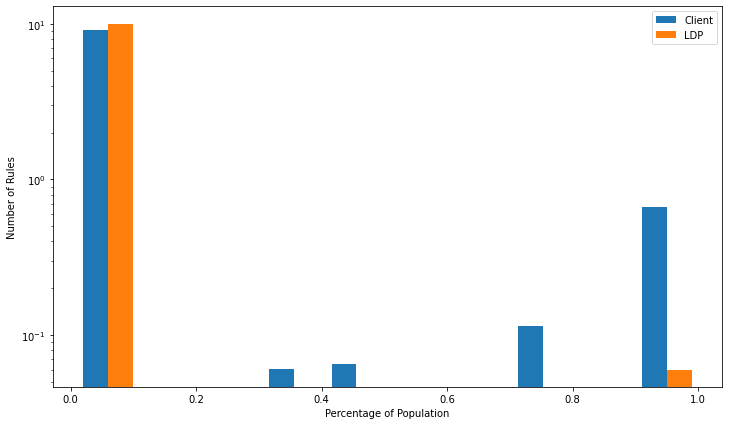

In [22]:
#make list of rule counts x population percents

lst = []
for idx, row in clientDF.iterrows():
    lst.extend([row['Percent of Population'] for i in range(row['Rule Count'])])
    
n_bins = 10

plt.figure(figsize=(12, 7))
plt.hist([lst, countDF['Client Count'].values], n_bins, density=True, histtype='bar',label=['Client', 'LDP'])
plt.xlabel("Percentage of Population")
plt.ylabel("Number of Rules")
plt.yscale('log')
plt.legend()
